## Inferring species trees with svd4tet
ipyrad includes a number of analysis tools that are optimized for analysis of RAD-seq data. The program __svd4tet__ uses the algorithm described by Chifman and Kubatko (2015) to quickly infer quartet trees from large SNP alignments, and then finds the best quartet-joined supertree with the program wQMC. Thus, it is pretty similar to the program __SVDquartets__, but with several additional features....

In [1]:
%%bash
svd4tet -h


 --------------------------------------------------
  Analysis tools for ipyrad [v.0.2.5]
  svd4tet -- fast quartet and tree inference 
 --------------------------------------------------
usage: svd4tet [-h] [-v] [-f] [-q] [-s seq] [-j json] [-m method]
               [-n nquartets] [-b boots] [-t starting_tree] [-o output_prefix]
               [-c cores] [--MPI]

optional arguments:
  -h, --help        show this help message and exit
  -v, --version     show program's version number and exit
  -f, --force       force overwrite of existing data
  -q, --quiet       do not print to stderror or stdout.
  -s seq            path to input phylip file (full seqs or SNPs)
  -j json           load existing saved analysis from json file.
  -m method         method for sampling quartets (all, random, or equal)
  -n nquartets      number of quartets to sample (if not -m all)
  -b boots          number of non-parametric bootstrap replicates
  -t starting_tree  newick file starting tree for equal 

### What does it do differently...?

... coming soon ...

### Calling svd4tet

In [4]:
%%bash

## call svd4tet with a snps file and an output name
svd4tet -s /home/deren/Documents/ipyrad/tests/cli/cli_outfiles/cli.u.snps.phy \
        -o cli_svd \
        -b 100 \
        -m all \
        -c 4 


 --------------------------------------------------
  Analysis tools for ipyrad [v.0.2.5]
  svd4tet -- fast quartet and tree inference 
 --------------------------------------------------
  ipyparallel setup: Local connection to 4 Engines

  loading array [12 taxa x 693 bp]
  loading all 495 possible quartets
  populating array with 495 quartets
  inferring 495 x 3 quartet trees
  [####################] 100%  
  running 100 bootstrap replicates
  [####################] 100%  
  Final quartet-joined and weighted quartet-joined tree files:          
  /home/deren/Documents/ipyrad/tests/cli_svd_analysis_svd/cli_svd_svd4tet.tre
  /home/deren/Documents/ipyrad/tests/cli_svd_analysis_svd/cli_svd_svd4tet.w.tre

  Bootstrap tree files:              
  /home/deren/Documents/ipyrad/tests/cli_svd_analysis_svd/cli_svd_svd4tet.boots
  /home/deren/Documents/ipyrad/tests/cli_svd_analysis_svd/cli_svd_svd4tet.w.boots

  Final trees with bootstraps as edge labels: 
  /home/deren/Documents/ipyrad/tests/c

GLib-GIO-Message: Using the 'memory' GSettings backend.  Your settings will not be saved or shared with other applications.
INFO:ipyrad.core.parallel:Shutting down [ipyrad-29539] remote Engines


### Plot the resulting tree in R
The command below allows us to run R code in this Jupyter notebook.

In [5]:
%load_ext rpy2.ipython

In [21]:
%%R
library(ape)
#library(ggtree)

tre <- read.tree("~/Documents/ipyrad/tests/cli_svd_analysis_svd/cli_svd_svd4tet.support.tre")
tre



Phylogenetic tree with 12 tips and 10 internal nodes.

Tip labels:
	3I_0, 3J_0, 3K_0, 3L_0, 1A_0, 1B_0, ...

Unrooted; includes branch lengths.


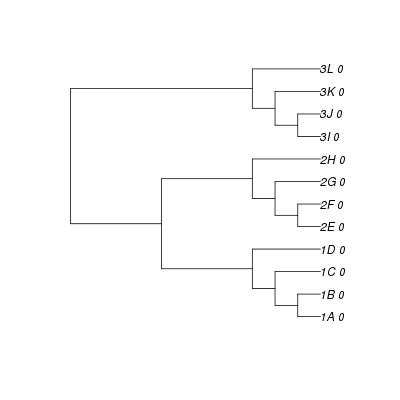

In [19]:
%%R -w 400 -h 400

tre <- read.tree("/home/deren/Documents/ipyrad/tests/cli_svd_analysis_svd/cli_svd_svd4tet.tre")

plot(tre)

In [34]:
a = "TGCAGAAGGGGTGCGAGTCAGTTTACTTGCATCATTTTGGGGCCTTACGTGTCAAGTACGTCTTAGTAAAGCCATGTCAGCTCCTGGCGTGTCTnnnnAACGTATGTCGATATTACGGCCCGCGCCCACGCGCCCACAGGCCCATGGTGAGGCGAACCCTTAAAAGTGACCTTATATTCTGTGATTATCCATAC-ACCG"

In [35]:
print a[5:]

AAGGGGTGCGAGTCAGTTTACTTGCATCATTTTGGGGCCTTACGTGTCAAGTACGTCTTAGTAAAGCCATGTCAGCTCCTGGCGTGTCTnnnnAACGTATGTCGATATTACGGCCCGCGCCCACGCGCCCACAGGCCCATGGTGAGGCGAACCCTTAAAAGTGACCTTATATTCTGTGATTATCCATAC-ACCG


In [38]:
print a[5:94]

AAGGGGTGCGAGTCAGTTTACTTGCATCATTTTGGGGCCTTACGTGTCAAGTACGTCTTAGTAAAGCCATGTCAGCTCCTGGCGTGTCT


In [37]:
print a[98:196]

AACGTATGTCGATATTACGGCCCGCGCCCACGCGCCCACAGGCCCATGGTGAGGCGAACCCTTAAAAGTGACCTTATATTCTGTGATTATCCATAC-A


In [39]:
a = "AAGGGGTGCGAGTCAGTTTACTTGCATCATTTTGGGGCCTTACGTGTCAAGTACGTCTTAGTAAAGCCATGTCAGCTCCTGGGGTGTCTnnnnAACGTATGTCGATATTACGGCCCGCGCCCACGCGCCCACAGGCCCATGGTGAGGCGAACCCTTAAAAGTGACCTTATATTCTGTAATTATCCATAC"

In [55]:
import numpy as np

m1 = np.invert([i in range(3, 10) for i in range(20)])

m2 = np.invert([i in range(26, 35) for i in range(24, 40)])

np.concatenate([m1, m2])

array([ True,  True,  True, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True], dtype=bool)